
 First 5 rows of the dataset 

        Date  Age          WorkClass  fnlwgt   education  education-num  \
0  3/20/1994   39          State-gov   77516   Bachelors             13   
1  1/14/1994   50   Self-emp-not-inc   83311   Bachelors             13   
2  8/14/1994   38            Private  215646     HS-grad              9   
3  3/17/1994   53            Private  234721        11th              7   
4  9/20/1994   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-w

C:\Users\nites\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


K=3 Neighbors : 

Training Accuracy/Score - 0.8373513948751954 

Test Accuracy/Score - 0.6980881865399492


Classification Report is

               precision    recall  f1-score   support

           0       0.78      0.84      0.81      6751
           1       0.38      0.29      0.33      2298

    accuracy                           0.70      9049
   macro avg       0.58      0.56      0.57      9049
weighted avg       0.68      0.70      0.68      9049



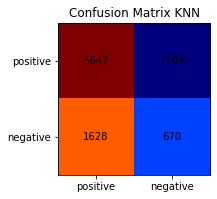

[[5647 1104]
 [1628  670]]

 KNN Model Prediction
[0 0 0 ... 0 1 0]
K=5 Neighbors : 

Training Accuracy/Score - 0.8031544546014304 

Test Accuracy/Score - 0.7091391313957344


Classification Report is

               precision    recall  f1-score   support

           0       0.77      0.87      0.82      6751
           1       0.38      0.24      0.30      2298

    accuracy                           0.71      9049
   macro avg       0.58      0.56      0.56      9049
weighted avg       0.67      0.71      0.68      9049



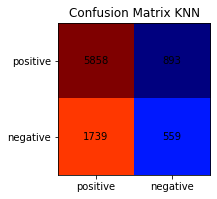

[[5858  893]
 [1739  559]]

 KNN Model Prediction
[0 0 0 ... 0 1 0]
K=7 Neighbors : 

Training Accuracy/Score - 0.7888978354568276 

Test Accuracy/Score - 0.7148856227207426


Classification Report is

               precision    recall  f1-score   support

           0       0.77      0.88      0.82      6751
           1       0.39      0.22      0.28      2298

    accuracy                           0.71      9049
   macro avg       0.58      0.55      0.55      9049
weighted avg       0.67      0.71      0.68      9049



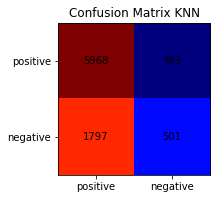

[[5968  783]
 [1797  501]]

 KNN Model Prediction


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[0 0 0 ... 0 0 0]


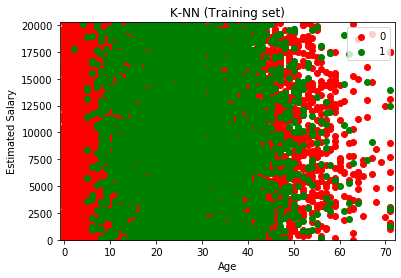

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


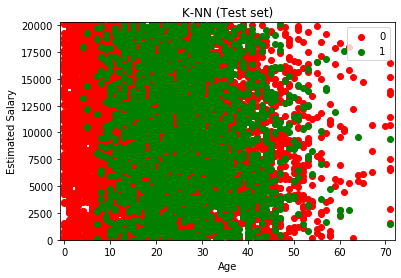

In [42]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt

from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import preprocessing
import sklearn.metrics as metrics

####### 1. Load census dataset as provided.#######

#read the csv file into a Pandas data frame
df_census = pd.read_csv('census1994.csv', delimiter = ',')

####### 2. Create a dataframe and print the first and last five records of your dataset.#######

#return the first 5 rows of the dataset
print('\n First 5 rows of the dataset \n')
print(df_census.head(5))

#return the last 5 rows of the dataset
print('\nLast 5 rows of the dataset\n')
print(df_census.tail(5))

#Before starting with the tasks in the assignment, we need to remove the rows with missing values
df_census=df_census[(df_census['Date'] != ' ?') & (df_census['Age'] != ' ?') & (df_census['WorkClass'] != ' ?') & (df_census['fnlwgt'] != ' ?') & (df_census['education'] != ' ?') & (df_census['education-num'] != ' ?') & (df_census['marital-status'] != ' ?') & (df_census['occupation'] != ' ?') & (df_census['relationship'] != ' ?') & (df_census['race'] != ' ?') & (df_census['gender'] != ' ?') & (df_census['capital-gain'] != ' ?') & (df_census['capital-loss'] != ' ?') & (df_census['hours-per-week'] != ' ?') & (df_census['native-country'] != ' ?') & (df_census['class'] != ' ?')]
df_census = df_census.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#df_census['class']= df_census['class'].replace({' <=50K':0, ' >50K':1})
#Preprocessing the dataframe columns to be used for prediction
category_col = df_census.columns
labelEncoder = preprocessing.LabelEncoder()
for col in category_col:
    df_census[col] = labelEncoder.fit_transform(df_census[col])

######## 5. Select only 2 attributes for training and testing your model.#######

# Create training and test sets
X = df_census.iloc[:, [1, 3]].values
Y = df_census.iloc[:, 15].values

####### 3. Split your dataset 70% for training, and 30% for testing the classifier.####### 

### Splitting dataset1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)


#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

######## 6. Test it with three different number for neighbors and record the results.####### 

#Create KNN Classifier(K=3) using Euclidean
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print(f'K=3 Neighbors : \n\nTraining Accuracy/Score - {train_score} \n\nTest Accuracy/Score - {test_score}')

from sklearn.metrics import classification_report, confusion_matrix

print("\n\nClassification Report is\n\n",classification_report(y_test, y_pred))

#Confusion Matrix using Entropy
conf_arr_knn =confusion_matrix(y_test,y_pred)

norm_conf_1 = []
for i in conf_arr_knn:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf_1.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax1 = fig.add_subplot(1,2,2)
ax1.set_aspect(1)
res = ax1.imshow(np.array(norm_conf_1), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_knn.shape

for x in range(width):
    for y in range(height):
        ax1.annotate(str(conf_arr_knn[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix KNN")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()
print(conf_arr_knn)

#Predict Output
print('\n KNN Model Prediction')
print(knn.predict(X_test))

#Create KNN Classifier(K=5)
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print(f'K=5 Neighbors : \n\nTraining Accuracy/Score - {train_score} \n\nTest Accuracy/Score - {test_score}')

from sklearn.metrics import classification_report, confusion_matrix

print("\n\nClassification Report is\n\n",classification_report(y_test, y_pred))

#Confusion Matrix using Entropy
conf_arr_knn =confusion_matrix(y_test,y_pred)

norm_conf_1 = []
for i in conf_arr_knn:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf_1.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax1 = fig.add_subplot(1,2,2)
ax1.set_aspect(1)
res = ax1.imshow(np.array(norm_conf_1), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_knn.shape

for x in range(width):
    for y in range(height):
        ax1.annotate(str(conf_arr_knn[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix KNN")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()
print(conf_arr_knn)

#Predict Output
print('\n KNN Model Prediction')
print(knn.predict(X_test))

#Create KNN Classifier(K=7)
knn = KNeighborsClassifier(n_neighbors=7,metric='euclidean')

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print(f'K=7 Neighbors : \n\nTraining Accuracy/Score - {train_score} \n\nTest Accuracy/Score - {test_score}')

from sklearn.metrics import classification_report, confusion_matrix

print("\n\nClassification Report is\n\n",classification_report(y_test, y_pred))

#Confusion Matrix using Entropy
conf_arr_knn =confusion_matrix(y_test,y_pred)

norm_conf_1 = []
for i in conf_arr_knn:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf_1.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax1 = fig.add_subplot(1,2,2)
ax1.set_aspect(1)
res = ax1.imshow(np.array(norm_conf_1), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_knn.shape

for x in range(width):
    for y in range(height):
        ax1.annotate(str(conf_arr_knn[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix KNN")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()
print(conf_arr_knn)

#Predict Output
print('\n KNN Model Prediction')
print(knn.predict(X_test))

# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() +1 , step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() +1, step = 0.01),sparse=True)
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            # alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),sparse=True)
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             #alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()